# HISTOGRAMS
- Histograms capture the frequency distribution of a set of data.
- Common uses:
    - Grayscale histograms for thresholding
    - White balancing
    - Color histo for object tracking in images(Camshift algo)
    - Histogram of image gradients to form HOG and SIFT.
- This lesson:
    - Use opencv to compute histo
    - Compute grayscal histo of image
    - Extract flattened RGB histo
- When plotting histo, X-axis serves as bins. That is, if we have configure for 256 bins, then we count no. of times each pixel occures.
- If no. of bins is 2, we count number of times pixel is in range [0,128] or [128,255].

In [1]:
import sys
sys.path.append("../")

In [2]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
from cv_imshow import display_image, create_subplot

In [3]:
args = {
    "image": "../images/beach.png"
}

## Grayscale Histogram
- Unnormalized histogram: Counts raw frequencies of distribution
- Normalized histo: Calc percentage of each color/bin.
    - Better for comparing images of different scale

(0.0, 256.0)

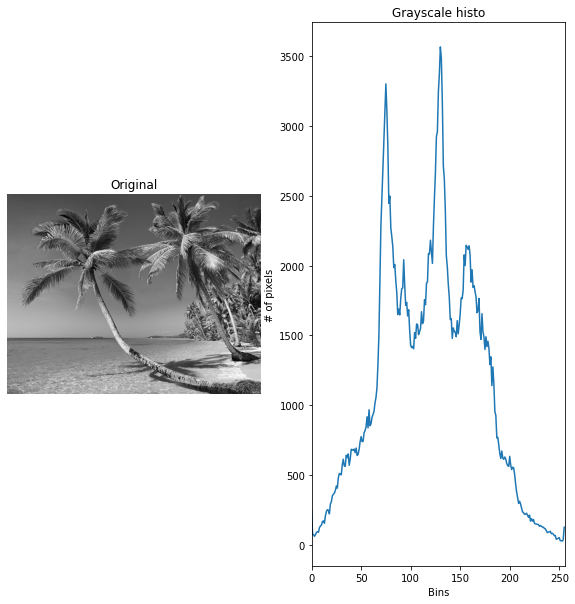

In [4]:
image = cv2.imread(args["image"])
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#construct a grayscale histo
hist = cv2.calcHist([image], [0], None, [256], [0,256])

rows = 1
columns = 2
fig = plt.figure(figsize=(10,10))

#matpltlib expects RGB
#Plot image
fig.add_subplot(rows, columns, 1)
plt.axis("off")
plt.title("Original")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_GRAY2RGB))

#plot histo
fig.add_subplot(rows, columns, 2)
plt.title("Grayscale histo")
plt.xlabel("Bins")
plt.ylabel("# of pixels")
plt.plot(hist)
plt.xlim([0,256])

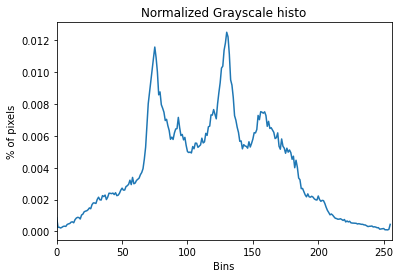

In [5]:
hist /= hist.sum()
plt.figure()
plt.title("Normalized Grayscale histo")
plt.xlabel("Bins")
plt.ylabel("% of pixels")
plt.plot(hist)
plt.xlim([0,256])
plt.show()

## Color Histograms

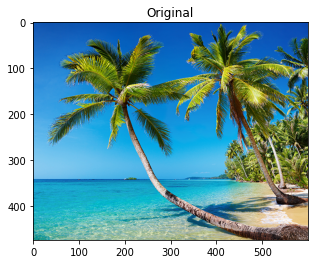

In [6]:
image = cv2.imread(args["image"])
display_image("Original", image)

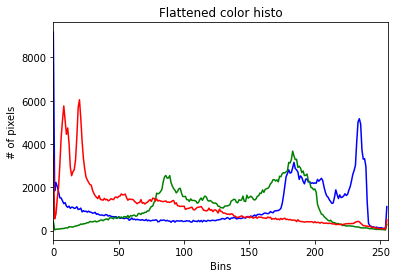

In [7]:
chans = cv2.split(image)
colors = ("b","g","r")
plt.figure()
plt.title("Flattened color histo")
plt.xlabel("Bins")
plt.ylabel("# of pixels")

#loop over channels
for (chan, color) in zip(chans, colors):
    #create histo for each chan
    hist = cv2.calcHist([chan], [0], None, [256], [0,256])
    plt.plot(hist, color=color)
    plt.xlim([0,256])

## Multidimensional histograms
- Here we take into consideration two channels at a time.
- "we can ask a question such as: 'How many pixels have a Red value of 10 AND a Blue value of 30?' 'How many pixels have a Green value of 200 AND a Red value of 130?' By using the conjunctive AND, we are able to construct multi-dimensional histograms."

2D histogram shape: (32, 32), with 1024 values


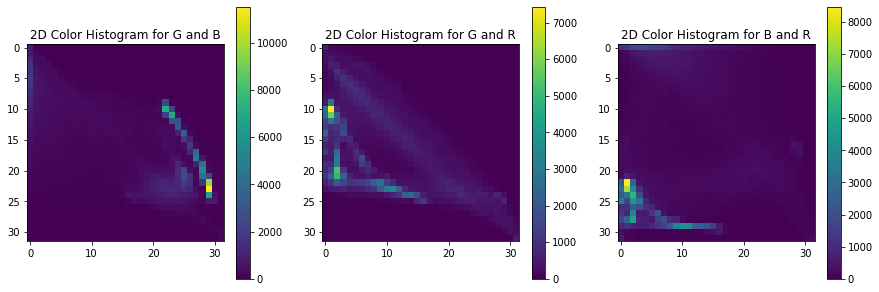

In [8]:
fig = plt.figure(figsize=(15,5))
 
# plot a 2D color histogram for green and blue
ax = fig.add_subplot(131)
hist = cv2.calcHist([chans[1], chans[0]], [0, 1], None, [32, 32],[0, 256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("2D Color Histogram for G and B")
plt.colorbar(p)
 
# plot a 2D color histogram for green and red
ax = fig.add_subplot(132)
hist = cv2.calcHist([chans[1], chans[2]], [0, 1], None, [32, 32],[0, 256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("2D Color Histogram for G and R")
plt.colorbar(p)
 
# plot a 2D color histogram for blue and red
ax = fig.add_subplot(133)
hist = cv2.calcHist([chans[0], chans[2]], [0, 1], None, [32, 32],[0, 256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("2D Color Histogram for B and R")
plt.colorbar(p)
 
# finally, let's examine the dimensionality of one of the 2D
# histograms
print("2D histogram shape: {}, with {} values".format(hist.shape, hist.flatten().shape[0]))

## Histogram equalization
- Improves the contrast of an image by "stretching" the distribution of pixels.
- Consider a histo with large peak at center. Histo Eq. will stretch the peak out towards the corner of the image, thus improving the global contrast of the image.

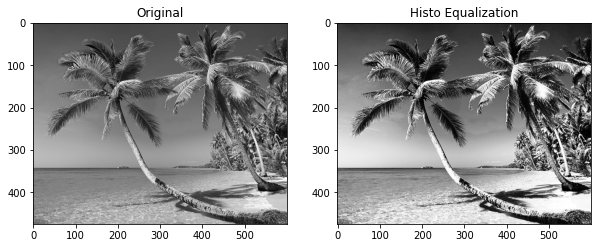

In [9]:
image = cv2.imread(args["image"])
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#apply histo equalization to stretch the contrast of our image.
eq = cv2.equalizeHist(image)

# show our images -- notice how the contrast of the second image hass been stretched
fig = plt.figure(figsize=(10,5))
create_subplot(fig, 1, 2, 1, "Original", image)
create_subplot(fig, 1, 2, 2, "Histo Equalization", eq)

## Histogram and Masks
- Construct mask and compute color histo only for the masked region

In [10]:
def plot_histogram(image, title, mask=None):
    #get channels
    chans = cv2.split(image)
    colors = ("b","g","r")
    plt.figure()
    plt.title(title)
    plt.xlabel("bins")
    plt.ylabel("# of pixels")
    
    #loop over channels
    for (chan,color) in zip(chans, colors):
        #create a histog
        hist = cv2.calcHist([chan], [0], mask, [256], [0,256])
        plt.plot(hist, color=color)
        plt.xlim([0,256])


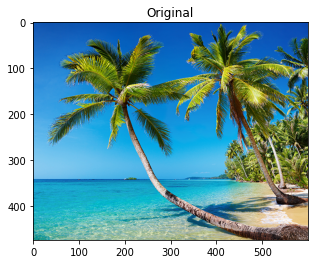

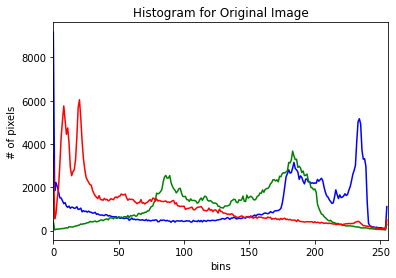

In [11]:
image = cv2.imread(args["image"])
display_image("Original", image)
plot_histogram(image, "Histogram for Original Image")

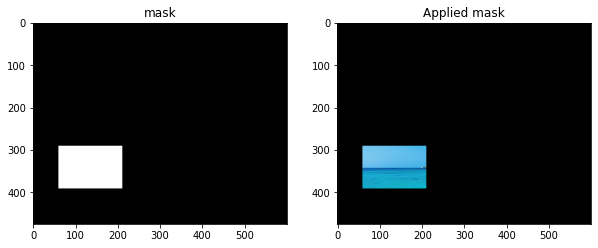

In [13]:
#construct a mask for our image
mask = np.zeros(image.shape[:2], dtype="uint8")
cv2.rectangle(mask,(60,290),(210,390),255,-1)
masked = cv2.bitwise_and(image, image, mask=mask)

fig = plt.figure(figsize=(10,5))
rows = 1 
columns = 2
create_subplot(fig, rows, columns, 1, "mask", mask)
create_subplot(fig, rows, columns, 2, "Applied mask", masked)

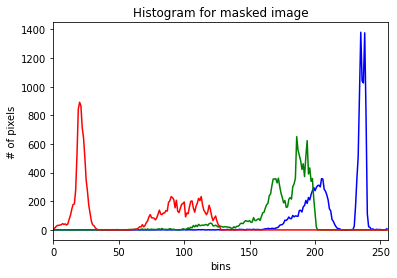

In [14]:
plot_histogram(image, "Histogram for masked image", mask=mask)
plt.show()